In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data_df = pd.read_json('https://api.telegram.org/bot1761023031:AAF61sXqktr3ar_GYAx_QvWb6pkKd3bin6I/getUpdates')


In [3]:
def clean_data(data, name1, name2):
  data_name1 = list(map(lambda x: x[name1], data))
  data_name2 = data_from = list(map(lambda x: x[name2], data_name1))
  return data_name2

In [4]:

data = list(map(lambda x: x['message'], data_df['result']))
data_df['from_id'] = clean_data(data, 'from', 'id')
data_df['from_isbot'] = clean_data(data, 'from', 'is_bot')
data_df['chat_type'] = clean_data(data, 'chat', 'type')
data_df['chat_username'] = clean_data(data, 'chat', 'username')
data_df['from_language_code'] = clean_data(data, 'from', 'language_code')
data_df['text'] = list(map(lambda x: x['text'], data))
data_df['date'] = list(map(lambda x: x['date'], data))
data_df['message_id'] = list(map(lambda x: x['message_id'], data))
data_df['update_id'] = list(map(lambda x: x['update_id'], data_df['result']))


In [5]:
data_new = pd.read_csv("data_chatbot.csv", sep=',', header=None)


In [6]:
data_new

,0,1,2,3,4,5
0,879665843,translate,sharp,20:44:40.084899,,20:44:40.598211
1,879665845,translate,sharp,20:44:57.928796,,20:44:58.461667
2,879665847,/translate,sharp,20:45:04.887422,острый,20:45:05.891340
3,879665848,/translate,чаевые,20:45:10.206707,tip,20:45:11.299860
4,879665849,/translate,чек,20:45:15.580749,receipt,20:45:16.372638
5,879665852,/antonyms,angry,20:45:40.193704,unangry,20:45:40.815621
6,879665854,/synonyms,charming,20:46:21.934808,"magic, magical, sorcerous, witching, wizard, ...",20:46:22.614497
7,879665863,/translate,"Is it for fear to wet a widow's eye,\nThat tho...",20:57:09.736097,"От страха ли промочить глаз вдове, Что ты пожи...",20:57:10.696680
8,879665866,/definitions,lake,20:58:02.273934,definition: a body of (usually fresh) water s...,20:58:02.878271
9,879665868,/examples,lake,20:58:11.440843,,20:58:11.998675


In [7]:
data_df = data_df.merge(data_new, right_on = 0, left_on = 'update_id', how='inner')
data_df.rename(columns={1:'operation', 3: 'start_time', 4: 'answer', 5: 'finish_time'}, inplace=True)
data_df.drop(columns=[0], inplace=True)
data_df.drop(columns=[2], inplace=True)
data_df['start_time']= pd.to_datetime(data_df['start_time'])
data_df['finish_time']= pd.to_datetime(data_df['finish_time'])
data_df['time'] = data_df['finish_time'] - data_df['start_time']


In [8]:
data_df


,ok,result,from_id,from_isbot,chat_type,chat_username,from_language_code,text,date,message_id,update_id,operation,start_time,answer,finish_time,time
0,True,"{'update_id': 879665863, 'message': {'message_...",490905654,False,private,DedAzaMarks,ru,"Is it for fear to wet a widow's eye,\nThat tho...",1626631029,436,879665863,/translate,2021-07-18 20:57:09.736097,"От страха ли промочить глаз вдове, Что ты пожи...",2021-07-18 20:57:10.696680,0 days 00:00:00.960583
1,True,"{'update_id': 879665866, 'message': {'message_...",490905654,False,private,DedAzaMarks,ru,lake,1626631082,441,879665866,/definitions,2021-07-18 20:58:02.273934,definition: a body of (usually fresh) water s...,2021-07-18 20:58:02.878271,0 days 00:00:00.604337
2,True,"{'update_id': 879665868, 'message': {'message_...",490905654,False,private,DedAzaMarks,ru,lake,1626631091,444,879665868,/examples,2021-07-18 20:58:11.440843,,2021-07-18 20:58:11.998675,0 days 00:00:00.557832
3,True,"{'update_id': 879665870, 'message': {'message_...",490905654,False,private,DedAzaMarks,ru,sunset,1626631103,447,879665870,/definitions,2021-07-18 20:58:24.861600,definition: the time in the evening at which ...,2021-07-18 20:58:25.991970,0 days 00:00:01.130370
4,True,"{'update_id': 879665871, 'message': {'message_...",490905654,False,private,DedAzaMarks,ru,math,1626631120,449,879665871,/definitions,2021-07-18 20:58:40.973808,definition: a science (or group of related sc...,2021-07-18 20:58:41.519592,0 days 00:00:00.545784
5,True,"{'update_id': 879665873, 'message': {'message_...",490905654,False,private,DedAzaMarks,ru,math,1626631128,452,879665873,/synonyms,2021-07-18 20:58:50.081359,"mathematics, maths",2021-07-18 20:58:50.607824,0 days 00:00:00.526465
6,True,"{'update_id': 879665874, 'message': {'message_...",490905654,False,private,DedAzaMarks,ru,meth,1626631133,454,879665874,/synonyms,2021-07-18 20:58:54.960455,"chalk, chicken feed, crank, deoxyephedrine, g...",2021-07-18 20:58:55.529759,0 days 00:00:00.569304
7,True,"{'update_id': 879665877, 'message': {'message_...",490905654,False,private,DedAzaMarks,ru,Russia,1626631167,459,879665877,/definitions,2021-07-18 20:59:27.909433,definition: a former communist country in eas...,2021-07-18 20:59:28.726288,0 days 00:00:00.816855
8,True,"{'update_id': 879665878, 'message': {'message_...",490905654,False,private,DedAzaMarks,ru,Russian Federation,1626631208,461,879665878,/definitions,2021-07-18 21:00:09.377939,definition: a native or inhabitant of Russia;...,2021-07-18 21:00:10.816732,0 days 00:00:01.438793
9,True,"{'update_id': 879665879, 'message': {'message_...",490905654,False,private,DedAzaMarks,ru,USA,1626631225,464,879665879,/definitions,2021-07-18 21:00:25.798577,definition: North American republic containin...,2021-07-18 21:00:26.378382,0 days 00:00:00.579805


In [9]:
# запросы для отчета

len(data_df['from_id'].unique()) # количество уникальных пользователей




1

In [10]:
len(data_df['message_id']) # количество сообщений 


11

In [11]:
data_df['chat_username'].unique() # имена уникальных пользователей


array(['DedAzaMarks'], dtype=object)

In [12]:
data_df[data_df.ok == False] # таблица ошибок

,ok,result,from_id,from_isbot,chat_type,chat_username,from_language_code,text,date,message_id,update_id,operation,start_time,answer,finish_time,time


<AxesSubplot:xlabel='operation', ylabel='Count'>

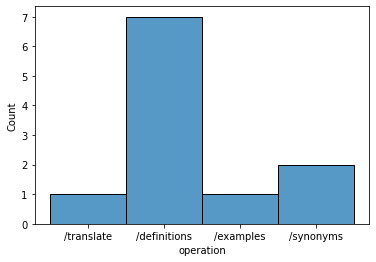

In [13]:
sns.histplot(data_df['operation'])

<AxesSubplot:xlabel='chat_username', ylabel='Count'>

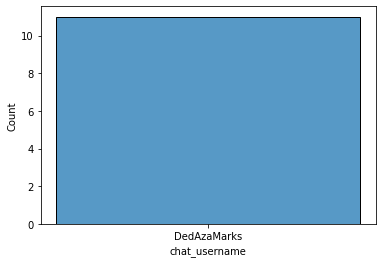

In [14]:
sns.histplot(data_df['chat_username'])